## Контроль версий

Команды похожи на Git.

Сначала давайте создадим набор данных Deep Lake в папке ./version_control_hub.

In [1]:
import deeplake
import numpy as np
from PIL import Image

/Users/tainella/opt/anaconda3/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.2.8) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [2]:
# Установим overwrite = True для возможности перезаписи
ds = deeplake.dataset('./version_control_hub', overwrite = True)

with ds:
    ds.create_tensor('images', htype = 'image', sample_compression = 'jpeg')
    ds.images.append(deeplake.read('./fer2013/train/fear/Training_136869.jpg'))

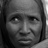

In [3]:
Image.fromarray(ds.images[0].numpy())

### Commit

In [4]:
first_commit_id = ds.commit('Added image of fear')

print('Dataset in commit {} has {} samples'.format(first_commit_id, len(ds)))

Dataset in commit firstdbf9474d461a19e9333c2fd19b46115348f has 1 samples


In [5]:
with ds:
    ds.images.append(deeplake.read('./fer2013/train/angry/Training_33331.jpg'))
    
second_commit_id = ds.commit('Added an image of anger')

print('Dataset in commit {} has {} samples'.format(second_commit_id, len(ds)))

Dataset in commit d5cd2c54ac44969ffbf138012a52c01e25a5c621 has 2 samples


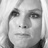

In [6]:
Image.fromarray(ds.images[1].numpy())

### Log

История коммитов

In [7]:
log = ds.log()

---------------
Deep Lake Version Log
---------------

Current Branch: main

Commit : d5cd2c54ac44969ffbf138012a52c01e25a5c621 (main) 
Author : public
Time   : 2023-02-15 18:43:20
Message: Added an image of anger

Commit : firstdbf9474d461a19e9333c2fd19b46115348f (main) 
Author : public
Time   : 2023-02-15 18:41:16
Message: Added image of fear



### Branch

Ветвление создается командой ds.checkout с параметром create = True.

Давайте создадим новую ветку angry_flipped, перевернем второе изображение (angry) и создадим новый коммит в этой ветке.

In [12]:
ds.checkout('angry_flipped2', create = True)

with ds:
    ds.images[1] = np.transpose(ds.images[1], axes=[1, 0])

flipped_commit_id = ds.commit('Flipped the angry image')

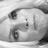

In [11]:
Image.fromarray(ds.images[1].numpy())

In [12]:
ds.log()

---------------
Deep Lake Version Log
---------------

Current Branch: angry_flipped

Commit : bb68c69cafd6b03c361acfe437f95d02ca3aeae5 (angry_flipped) 
Author : public
Time   : 2023-02-15 18:49:44
Message: Flipped the angry image

Commit : d5cd2c54ac44969ffbf138012a52c01e25a5c621 (main) 
Author : public
Time   : 2023-02-15 18:43:20
Message: Added an image of anger

Commit : firstdbf9474d461a19e9333c2fd19b46115348f (main) 
Author : public
Time   : 2023-02-15 18:41:16
Message: Added image of fear



### Checkout

Переключение веток

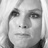

In [13]:
ds.checkout('main')

Image.fromarray(ds.images[1].numpy())

### Diff

Позволяет определять количество выборок, которые были добавлены, удалены или обновлены для каждого тензора. Функция может быть использована 3 способами:

In [14]:
ds.diff() # Разница между текущим состоянием и последним commit


## Deep Lake Diff
------------------------------------------------------------------------------------------------------------------------
Diff in HEAD relative to the previous commit:

********************************************************************************
commit UNCOMMITTED HEAD
Author: None
Date: None
Message: None

No changes were made in this commit.
------------------------------------------------------------------------------------------------------------------------


In [15]:
ds.diff(first_commit_id) # Разница между текущим состоянием и определенным commit


## Deep Lake Diff
The 2 diffs are calculated relative to the most recent common ancestor (firstdbf9474d461a19e9333c2fd19b46115348f) of the current state and the commit passed.
------------------------------------------------------------------------------------------------------------------------
Diff in HEAD:

********************************************************************************
commit UNCOMMITTED HEAD
Author: None
Date: None
Message: None

No changes were made in this commit.
********************************************************************************
commit d5cd2c54ac44969ffbf138012a52c01e25a5c621
Author: public
Date: 2023-02-15 18:43:20
Message: Added an image of anger

images
* Added 1 sample: [1-2]

------------------------------------------------------------------------------------------------------------------------
Diff in firstdbf9474d461a19e9333c2fd19b46115348f (target id):

No changes were made.

---------------------------------------------------------------

In [16]:
ds.diff(second_commit_id, first_commit_id) # Разница между текущим двумя определенными commit


## Deep Lake Diff
The 2 diffs are calculated relative to the most recent common ancestor (firstdbf9474d461a19e9333c2fd19b46115348f) of the two commits passed.
------------------------------------------------------------------------------------------------------------------------
Diff in d5cd2c54ac44969ffbf138012a52c01e25a5c621 (target id 1):

********************************************************************************
commit d5cd2c54ac44969ffbf138012a52c01e25a5c621
Author: public
Date: 2023-02-15 18:43:20
Message: Added an image of anger

images
* Added 1 sample: [1-2]

------------------------------------------------------------------------------------------------------------------------
Diff in firstdbf9474d461a19e9333c2fd19b46115348f (target id 2):

No changes were made.

------------------------------------------------------------------------------------------------------------------------


### HEAD Commit

В отличие от Git, система контроля версий Deep Lake не имеет промежуточной области, поскольку изменения в наборах данных не сохраняются локально до их фиксации. Все изменения автоматически отражаются в постоянном хранилище наборов данных (локальном или облачном). Таким образом, любые изменения в наборе данных автоматически сохраняются в фиксации HEAD в текущей ветви. Это означает, что незафиксированные изменения не отображаются в других ветвях. Давайте посмотрим, как это работает:
В данный момент вы должны находиться на главной ветке, в которой есть 2 образца. Давайте добавим еще одно изображение:

In [2]:
ds = deeplake.load('./version_control_hub')

./version_control_hub loaded successfully.


In [3]:
print('Dataset on {} branch has {} samples'.format('main', len(ds)))

with ds:
    ds.images.append(deeplake.read('./fer2013/train/sad/Training_26728.jpg'))
    
print('After updating, the HEAD commit on {} branch has {} samples'.format('main', len(ds)))

Dataset on main branch has 2 samples
After updating, the HEAD commit on main branch has 3 samples


In [4]:
with ds:
    ds.images.append(deeplake.read('./fer2013/train/angry/Training_63181.jpg'))

Далее, если мы провериим ветвку angry_flipped, набор данных содержит 2 выборки, что соответствует количеству выборок с момента создания этой ветви. Следовательно, дополнительный незафиксированный третий образец, который был добавлен в основную ветвь выше, не отражается при извлечении других ветвей или коммитов.

In [5]:
ds.checkout('angry_flipped')

print('Dataset in {} branch has {} samples'.format('dog_flipped', len(ds)))

Dataset in dog_flipped branch has 2 samples


При повторной проверке нашей основной ветки предыдущие незафиксированные изменения становятся видимыми, и они сохраняются в HEAD commit на main:

In [6]:
ds.checkout('main')

print('Dataset in {} branch has {} samples'.format('main', len(ds)))

Dataset in main branch has 4 samples


#### Вы можете удалить любые незафиксированные изменения, используя приведенную ниже команду сброса, которая вернет основную ветвь в состояние с 2 образцами

In [7]:
ds.reset()

In [8]:
print('Dataset in {} branch has {} samples'.format('main', len(ds)))

Dataset in main branch has 2 samples


### Merge

Слияние - важнейшая функция для совместной работы с наборами данных. Это позволяет вам изменять данные в отдельных ветвях, прежде чем сделать эти изменения доступными в основной ветви, что позволяет вам экспериментировать с вашими данными, не влияя на рабочие процессы других сотрудников.
В настоящее время мы находимся на главной ветке, где изображение злости находится правой стороной вверх

In [13]:
ds.log()

---------------
Deep Lake Version Log
---------------

Current Branch: angry_flipped2

Commit : 5793ca8454440bd30968dc7940321a34bc6cd237 (angry_flipped2) 
Author : public
Time   : 2023-02-16 17:36:00
Message: Flipped the angry image

Commit : d5cd2c54ac44969ffbf138012a52c01e25a5c621 (main) 
Author : public
Time   : 2023-02-15 18:43:20
Message: Added an image of anger

Commit : firstdbf9474d461a19e9333c2fd19b46115348f (main) 
Author : public
Time   : 2023-02-15 18:41:16
Message: Added image of fear



In [14]:
ds.checkout('main')

'd5cd2c54ac44969ffbf138012a52c01e25a5c621'

In [15]:
ds.merge('angry_flipped')

In [16]:
ds.log()

---------------
Deep Lake Version Log
---------------

Current Branch: main

Commit : d5d84071751d3cff40cd99101aedf7ad2a5ec398 (main) 
Author : public
Time   : 2023-02-16 17:37:29
Message: Merge 5793ca8454440bd30968dc7940321a34bc6cd237 into main

Commit : d5cd2c54ac44969ffbf138012a52c01e25a5c621 (main) 
Author : public
Time   : 2023-02-15 18:43:20
Message: Added an image of anger

Commit : firstdbf9474d461a19e9333c2fd19b46115348f (main) 
Author : public
Time   : 2023-02-15 18:41:16
Message: Added image of fear

